In [168]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='horusa', 
                       user='root', 
                       password='root', 
                       db='zio', 
                       charset='utf8mb4', 
                       autocommit=True, 
                       cursorclass=pymysql.cursors.DictCursor)

def get_investors_volume() :
    cur = conn.cursor()
    sql = "select DATEON, PERSONAL, FOREIGNER, COMPANY, FINANCE, INSURANCE, TOOSIN, BANK, ETC_FIN, GOV_FUND, ETC_FUND from CRAWL_INVESTOR_DAILY_VOLUME where TYPE_CODE='02'"
    cur.execute(sql)
    result = cur.fetchall()
    cur.close()
    df = pd.DataFrame(result)
    df = df.set_index('DATEON')
    return df

def exec_query(sql) -> pd.DataFrame :
    cur = conn.cursor()
    cur.execute(sql)
    result = cur.fetchall()
    # print(result.count())
    cur.close()
    df = pd.DataFrame(result)
    return df

# def end_price(sql = "select * from CRWAL_INVESTOR_STOCK_TYPE") :
#     return exec_query(sql)

def get_daily_kosdaq() :
    sql = 'select * from CRAWL_MARKET_DAILY_DATA'
    return exec_query(sql)

def get_daily_investors_volume() :
    sql = "select DATEON, PERSONAL, FOREIGNER, COMPANY, FINANCE, INSURANCE, TOOSIN, BANK, ETC_FIN, GOV_FUND, ETC_FUND from CRAWL_INVESTOR_DAILY_VOLUME where TYPE_CODE='02'"
    return exec_query(sql)

# get_investors_volume()

#end_price()
get_daily_kosdaq()

# from pycaret.datasets import get_data
# get_data('insurance')

,TYPE_CODE,DATEON,CLOSING_PRICE,UP_DOWN_PER,VOLUME,VOLUME_AMT
0,KOSDAQ,1996.07.04,1018.40,1.30,235.0,5247.0
1,KOSDAQ,1996.07.05,1037.80,1.90,59.0,894.0
2,KOSDAQ,1996.07.06,1048.80,1.06,34.0,338.0
3,KOSDAQ,1996.07.08,1048.20,-0.06,39.0,822.0
4,KOSDAQ,1996.07.09,1060.10,1.14,45.0,589.0
...,...,...,...,...,...,...
7047,KOSDAQ,2024.08.19,777.47,-1.13,1135630.0,7653030.0
7048,KOSDAQ,2024.08.20,787.44,1.28,997056.0,7990590.0
7049,KOSDAQ,2024.08.21,779.87,-0.96,1073930.0,8370580.0
7050,KOSDAQ,2024.08.22,773.47,-0.82,950992.0,9216820.0


In [169]:
investors_volume = get_daily_investors_volume()
# investors_volume = investors_volume.sort_value(by=['DATEON'], axis=0, ascending=True)
# investors_volume.reset_index()
investors_volume = investors_volume.set_index('DATEON')
investors_volume.sort_index(ascending=False, inplace=True)

daily_kosdaq = get_daily_kosdaq()
daily_kosdaq['DATEON'] = daily_kosdaq['DATEON'].str[2:]
daily_kosdaq.set_index('DATEON').drop(labels = ['TYPE_CODE'], axis=1)

import pandas as pd

merged = pd.merge(left=investors_volume, right=daily_kosdaq, how='inner', on='DATEON')

merged.set_index('DATEON')
merged.sort_index(ascending=False, inplace=True)
merged = merged.set_index('DATEON')
merged = merged.drop(labels = ['TYPE_CODE'], axis=1)
merged

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,CLOSING_PRICE,UP_DOWN_PER,VOLUME,VOLUME_AMT
DATEON,,,,,,,,,,,,,,
05.01.19,380.0,-250.0,-130.0,46.0,9.0,-98.0,-20.0,-35.0,-33.0,0.0,455.59,1.46,626990.0,1779610.0
05.01.20,323.0,-185.0,-138.0,6.0,13.0,5.0,-45.0,7.0,-124.0,0.0,450.63,-1.09,709356.0,1847210.0
05.01.21,235.0,-177.0,-58.0,3.0,-17.0,-49.0,24.0,-2.0,-17.0,0.0,460.62,2.22,607820.0,1587980.0
05.01.24,321.0,-124.0,-196.0,-33.0,12.0,-48.0,22.0,-15.0,-135.0,0.0,472.75,2.63,603670.0,1756330.0
05.01.25,275.0,-76.0,-199.0,-24.0,-17.0,4.0,-34.0,-11.0,-117.0,0.0,467.29,-1.15,691510.0,1931120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.08.19,1394.0,-1130.0,-134.0,-59.0,31.0,-43.0,0.0,-54.0,-8.0,-130.0,777.47,-1.13,1135630.0,7653030.0
24.08.20,-1106.0,1005.0,156.0,218.0,25.0,-204.0,-5.0,-54.0,176.0,-55.0,787.44,1.28,997056.0,7990590.0
24.08.21,3639.0,-3343.0,-47.0,276.0,35.0,-414.0,-4.0,4.0,57.0,-249.0,779.87,-0.96,1073930.0,8370580.0


In [170]:
def create_ex_columns(df , name: str) :
    # print(name + ' newly added ..')
    df[name + '_SUM_D5'] = df[name].rolling(5).sum().shift(1)
    df[name + '_AVG_D5'] = df[name].rolling(5).mean().shift(1)
    df[name + '_STD_D5'] = df[name].rolling(5).std().shift(1)
    df[name + '_SUM_D10'] = df[name].rolling(10).sum().shift(1)
    df[name + '_AVG_D10'] = df[name].rolling(10).mean().shift(1)
    df[name + '_STD_D10'] = df[name].rolling(10).std().shift(1)
    df[name + '_SUM_D20'] = df[name].rolling(20).sum().shift(1)
    df[name + '_AVG_D20'] = df[name].rolling(20).mean().shift(1)
    df[name + '_STD_D20'] = df[name].rolling(20).std().shift(1)

feature_cols = ['PERSONAL', 'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK', 'ETC_FIN', 'GOV_FUND', 'ETC_FUND',
                'UP_DOWN_PER', 'VOLUME', 'VOLUME_AMT', 'CLOSING_PRICE']

for col in feature_cols:
    create_ex_columns(merged, col)
    


# merged.sort_index(ascending=True, inplace=False)

merged['PRED_OUT_D3'] = merged['CLOSING_PRICE'].rolling(3).mean().shift(-3)  # merged['PRED_OUT'] = merged['CLOSING_PRICE'].shift(1)
# merged[['DATEON', 'CLOSING_PRICE', 'PRED_OUT_D3', 'VOLUME_AMT', 'VOLUME_AMT_SUM_D5']]

merged = merged.reset_index()
merged = merged.set_index('DATEON')

# merged = merged.drop(['CLOSING_PRICE'], axis=1)

today = merged.tail(1)
merged = merged.dropna()
merged                      

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,CLOSING_PRICE_SUM_D5,CLOSING_PRICE_AVG_D5,CLOSING_PRICE_STD_D5,CLOSING_PRICE_SUM_D10,CLOSING_PRICE_AVG_D10,CLOSING_PRICE_STD_D10,CLOSING_PRICE_SUM_D20,CLOSING_PRICE_AVG_D20,CLOSING_PRICE_STD_D20,PRED_OUT_D3
DATEON,,,,,,,,,,,,,,,,,,,,,
05.02.21,256.0,-39.0,-217.0,22.0,-9.0,-73.0,4.0,4.0,-165.0,0.0,...,2550.28,510.056,4.629517,4911.89,491.189,21.439094,9567.93,478.3965,20.436571,494.240000
05.02.22,92.0,61.0,-153.0,-6.0,-8.0,-2.0,-13.0,-10.0,-114.0,0.0,...,2555.65,511.130,2.983094,4954.46,495.446,20.073507,9620.95,481.0475,20.758737,494.253333
05.02.23,170.0,12.0,-182.0,1.0,-12.0,-86.0,-13.0,-4.0,-69.0,0.0,...,2542.39,508.478,8.013711,4987.51,498.751,16.276298,9665.15,483.2575,19.674495,496.953333
05.02.24,-251.0,182.0,70.0,-39.0,-15.0,71.0,-21.0,2.0,73.0,0.0,...,2519.42,503.884,10.720883,5012.28,501.228,11.970795,9694.81,484.7405,18.984069,497.266667
05.02.25,-351.0,310.0,41.0,-15.0,45.0,47.0,-6.0,20.0,-50.0,0.0,...,2501.99,500.398,8.858542,5028.49,502.849,9.907143,9719.67,485.9835,18.971521,498.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.08.13,2406.0,-1742.0,-689.0,2.0,-29.0,-408.0,0.0,-33.0,-220.0,25.0,...,3763.84,752.768,15.842672,7654.91,765.491,37.570849,15814.30,790.7150,37.821597,780.210000
24.08.14,-807.0,828.0,8.0,-84.0,22.0,67.0,-2.0,-47.0,52.0,-29.0,...,3795.83,759.166,11.721509,7615.99,761.599,35.098263,15739.55,786.9775,36.402264,783.746667
24.08.16,-1344.0,1010.0,659.0,9.0,22.0,427.0,-14.0,-43.0,258.0,-325.0,...,3824.12,764.824,12.130698,7589.67,758.967,32.528989,15686.97,784.3485,35.050035,781.593333


In [171]:
today = today.drop('PRED_OUT_D3', axis=1)
today

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,VOLUME_AMT_STD_D20,CLOSING_PRICE_SUM_D5,CLOSING_PRICE_AVG_D5,CLOSING_PRICE_STD_D5,CLOSING_PRICE_SUM_D10,CLOSING_PRICE_AVG_D10,CLOSING_PRICE_STD_D10,CLOSING_PRICE_SUM_D20,CLOSING_PRICE_AVG_D20,CLOSING_PRICE_STD_D20
DATEON,,,,,,,,,,,,,,,,,,,,,
24.08.23,-595.0,1126.0,-99.0,59.0,36.0,-153.0,-7.0,-179.0,145.0,-431.0,...,1.042908e+06,3904.58,780.916,5.922118,7728.7,772.87,12.366093,15504.02,775.201,29.130477


In [172]:
train = merged.sample(frac=0.95, random_state=786)
test = merged.drop(train.index)
# train.reset_index(inplace=True, drop=False)
# test.reset_index(inplace=True, drop=False)

# train.sort_index(ascending=False)
test.sort_index(ascending=False)

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,CLOSING_PRICE_SUM_D5,CLOSING_PRICE_AVG_D5,CLOSING_PRICE_STD_D5,CLOSING_PRICE_SUM_D10,CLOSING_PRICE_AVG_D10,CLOSING_PRICE_STD_D10,CLOSING_PRICE_SUM_D20,CLOSING_PRICE_AVG_D20,CLOSING_PRICE_STD_D20,PRED_OUT_D3
DATEON,,,,,,,,,,,,,,,,,,,,,
24.07.19,-225.0,-312.0,650.0,-185.0,38.0,706.0,-1.0,-4.0,96.0,-113.0,...,4194.75,838.950,13.106958,8472.90,847.290,12.927186,16884.26,844.2130,10.317510,812.110000
24.06.17,1584.0,3.0,-659.0,3.0,-43.0,-516.0,-1.0,-51.0,-51.0,-928.0,...,4337.26,867.452,3.918740,8584.73,858.473,11.899158,17034.53,851.7265,11.661693,859.210000
24.04.02,4769.0,-2284.0,-2370.0,-766.0,-80.0,-1246.0,3.0,1.0,-281.0,-115.0,...,4555.34,911.068,3.847157,9060.66,906.066,8.589097,17852.28,892.6140,16.776924,878.383333
23.12.07,1664.0,-1559.0,-24.0,-123.0,63.0,-21.0,-1.0,-26.0,83.0,-81.0,...,4120.36,824.072,7.459231,8200.47,820.047,7.151491,16225.49,811.2745,13.828344,835.050000
23.09.08,-561.0,-481.0,1285.0,1005.0,-112.0,363.0,-30.0,-32.0,91.0,-243.0,...,4584.69,916.938,6.048481,9161.90,916.190,8.725679,18095.37,904.7685,15.860840,897.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05.05.16,-97.0,84.0,13.0,15.0,5.0,40.0,12.0,-11.0,-48.0,0.0,...,2146.00,429.200,2.403310,4283.01,428.301,3.271967,8677.92,433.8960,7.373712,438.893333
05.03.18,25.0,25.0,-50.0,-7.0,20.0,18.0,-38.0,-11.0,-32.0,0.0,...,2422.15,484.430,8.640700,4866.00,486.600,8.758827,9873.40,493.6700,10.903048,459.003333
05.03.11,-114.0,-20.0,134.0,3.0,4.0,123.0,26.0,-14.0,-9.0,0.0,...,2443.85,488.770,9.283286,4931.83,493.183,7.812867,9944.11,497.2055,10.668886,486.556667


In [173]:
from pycaret.regression import *

s = setup(data = train, target='PRED_OUT_D3', session_id=123, normalize=True, normalize_method='zscore')

,Description,Value
0,Session id,123
1,Target,PRED_OUT_D3
2,Target type,Regression
3,Original data shape,"(4580, 141)"
4,Transformed data shape,"(4580, 141)"
5,Transformed train set shape,"(3206, 141)"
6,Transformed test set shape,"(1374, 141)"
7,Numeric features,140
8,Preprocess,True
9,Imputation type,simple


In [174]:
best = compare_models(include=['et'])


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:13:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.2566,87.6909,9.3128,0.9964,0.0145,0.0097,0.8100


In [175]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [176]:
pred_holdout = predict_model(best)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,6.1937,84.8741,9.2127,0.9965,0.0146,0.0097


In [177]:
predictions = predict_model(best, data = today)
predictions

,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,...,CLOSING_PRICE_SUM_D5,CLOSING_PRICE_AVG_D5,CLOSING_PRICE_STD_D5,CLOSING_PRICE_SUM_D10,CLOSING_PRICE_AVG_D10,CLOSING_PRICE_STD_D10,CLOSING_PRICE_SUM_D20,CLOSING_PRICE_AVG_D20,CLOSING_PRICE_STD_D20,prediction_label
DATEON,,,,,,,,,,,,,,,,,,,,,
24.08.23,-595.0,1126.0,-99.0,59.0,36.0,-153.0,-7.0,-179.0,145.0,-431.0,...,3904.580078,780.916016,5.922118,7728.700195,772.869995,12.366094,15504.019531,775.200989,29.130476,772.943701


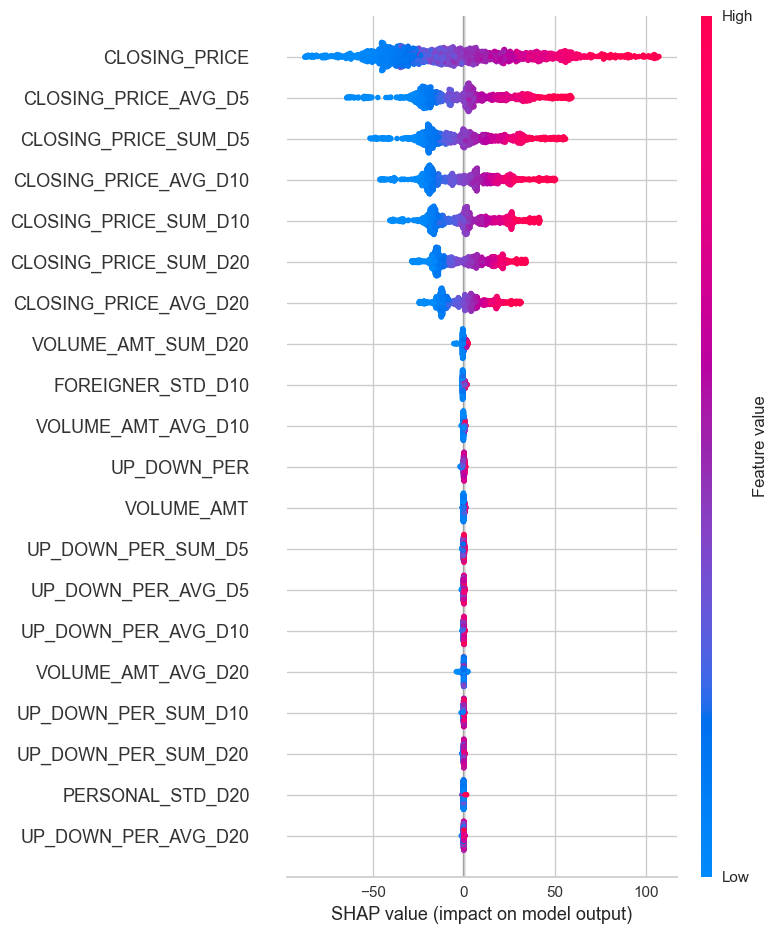

In [178]:
interpret_model(best)